Data set idea: weight loss

Variables:
- day - daily time series

- weight 
    - estimated by calories in / calories out based on 3500cal as 450g lost (https://www.mayoclinic.org/healthy-lifestyle/weight-loss/in-depth/calories/art-20048065) so every 1 calorie = 0.128205128g
    - Weight loss will be calculated each day. (calories out - calories in) * 0.0128205128 +/- random noise as weight loss is not exact


- calories in based on logging food with LoseIt 
    - split by carbs/protein/fat? put into separate variables by percent?
    - Not going to split by c/p/f in dataset but will just state calorie count assuming she maintains good ratios 
    
    
- calories out - based on BMR/TDEE and exercise
- target calorie amount - same number throughout
- over/under calorie target
- exercise 
    - boolean?  True/False whether I exercised or not
    - categorical? Listing different exercises (walk, run, yoga class, weight training)
    - estimated calories burned?
 - calories out - tdee + exercise 
     - function created to calculate tdee as it fluctuates each day
     - maybe +/- random amount to exercise so it's not so samey
    
Run weekly - 52 weeks per year over 2 years = 104 rows
or 
Daily - January-April 2019 inclusive = 119 rows
Can't figure out which would be better

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Time" data-toc-modified-id="Time-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Time</a></span><ul class="toc-item"><li><span><a href="#Code" data-toc-modified-id="Code-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Code</a></span></li></ul></li><li><span><a href="#Calories" data-toc-modified-id="Calories-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Calories</a></span></li><li><span><a href="#Calories-In" data-toc-modified-id="Calories-In-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calories In</a></span></li><li><span><a href="#Weight-Loss" data-toc-modified-id="Weight-Loss-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Weight Loss</a></span></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise</a></span></li></ul></div>

This project simulates a dataset created by a woman - let's call her Zoe - who decided to track her weight loss efforts over the course of a year. She set a daily calorie goal and committed to an average of 45 minutes of exercise approximately five days per week. She did a lot of research before beginning her journey to set herself up for success and was very fastidious in logging her calorie intake and estimated calorie output. 



In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

## Time

There is a lot of conflicting information online about how often one should weigh themselves when trying to lose weight. Some believe that weighing in too frequently can cause anxiety (https://health.clevelandclinic.org/why-you-shouldnt-weigh-yourself-every-single-day/) or discouragement (https://www.medicinenet.com/to_weigh__or_not_to_weighthat_is_the_question/views.htm) as weight fluctuations in the short-term can be quite unpredictable due to factors such as hydration or what was last eaten. However, some studies have shown that higher weighing frequency is associated with greater weight loss, (https://link.springer.com/article/10.1207/s15324796abm3003_5) less weight regain, (https://link.springer.com/article/10.1186/1479-5868-5-54) and is not associated with adverse psychological outcomes like anxiety (https://onlinelibrary.wiley.com/doi/full/10.1002/oby.20946). It really comes down to personal preference and what an individual feels works well for them. (https://blog.myfitnesspal.com/how-often-should-you-weigh-yourself/)

Zoe is interested in collecting as much data as possible to track her weight loss efforts and so decides to weigh herself first thing in the morning every day (https://www.consumerreports.org/scales/the-best-time-to-weigh-yourself/) as she finds the consistent feedback helps her to stay on track and keep herself accountable. 

### Code

To simulate the 


In [3]:
date = pd.date_range('2019-01-01', periods=365, freq='D')

# Change date format https://stackoverflow.com/a/38812486 but this returns an array of stings, not datetimes.
date.strftime('%d/%m/%Y')
date

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

## Calories 

Weight loss is very complex and depends on many factors such as: (https://www.niddk.nih.gov/health-information/weight-management/adult-overweight-obesity/factors-affecting-weight-health)

- Genetics
- Race
- Sex
- Age
- Diet
- Physical activity
- Environment
- Medical issues

Zoe is a 30 year old white Irish woman who lives in the suburbs and works at a sedentary office job. She has a moderately balanced diet but exercises very little and does not have any known medical issues that would hinder weight loss. She believes that she can begin to lose weight by making some slight lifestyle adjustments rather than any drastic changes. In particular she plans to lower her calorie intake and add in a bit of exercise. 

The first thing she did was calculate how many calories she should consume per day in order to steadily lose weight. Two measurements were important here, her Basal Metabolic Rate (BMR) and Total Daily Energy Expenditure (TDEE). The BMR is the energy expenditure over a certain period of time by a person at rest (https://en.wikipedia.org/wiki/Basal_metabolic_rate). In other words, it is the number of calories burned by the body just by functioning normally without moving, such as breathing and circulating blood. It can be estimated based on a person's gender age, weight and height. The TDEE then is the number of calories a person should consume to maintain their current weight. There are many online calculators that help a person figure out their BMR - I have used a few different ones here see if different measurements are achieved:

Measurements used: Female, 30 years old, starting weight 80k,  height 175cm:

BMR
- 1578: https://tdeecalculator.net/  
- 1591: https://www.active.com/fitness/calculators/bmr 
- 1598: https://www.bodybuilding.com/fun/bmr_calculator.htm 
- 1578: https://www.calculator.net/bmr-calculator.html# 
- 1578: https://www.thecalculatorsite.com/health/bmr-calculator.php  (Mifflin St Jeor)
- 1600: https://www.thecalculatorsite.com/health/bmr-calculator.php (Harris Benedict)

TDEE: 
- https://tdeecalculator.net/ TDEE: 1894

https://www.thecalculatorsite.com/health/bmr-calculator.php - has good explanation of equations


Of course, not all calories are created equal. She could eat 1500 calories worth of junk food and still lose weight but this, of course would not be healthy. She aims each day to split her calorie allowance as follows: (https://www.healthline.com/nutrition/best-macronutrient-ratio#calorie-vs-calorie)

    - 45-65% carbohydrates
    - 20-35% fats
    - 10-35% proteins 
    
In this dataset the focus is on calories in and out but our subject is generally quite good at sticking to the above ratios. 

For exercise, look into how different exercises affect weight loss - a combination of cardio, strength training and flexibility training: https://www.verywellfit.com/types-of-exercise-for-weight-loss-3495992

With calories I might split by protein, ft and carbs - 

## Calories In

To track her calorie intake, Zoe used the LoseIt app (https://www.loseit.com/) which allows her to log everything she eats and provides her with a calorie total at the end of every day that she then logs into her dataset. 

It is not healthy to go below 1200 calories daily as it would be difficult to get the nutrition the body needs (https://www.everydayhealth.com/weight/can-more-calories-equal-more-weight-loss.aspx

Zoe aims to lose the weight slowly and in a sustainable manner and so follows the guidance of 0.5kg per week (https://www.mayoclinic.org/healthy-lifestyle/weight-loss/in-depth/weight-loss/art-20047752) This means 

The randint function allows me to set minimum and maximum calorie values and was my first thought when trying to come up with a suitable function. As can be seen below, it returns 365 integer values that could potentially be used as calorie measurements.

In [48]:
# Using randint for calorie in values
first = np.random.randint(1200, 2500, 365)
first

array([2425, 2083, 1499, 2166, 1680, 1550, 1892, 1655, 2209, 2375, 1725,
       1419, 1432, 1875, 1902, 1528, 1220, 2162, 2349, 1442, 2256, 2459,
       2044, 1434, 1242, 1917, 2491, 2103, 1931, 1809, 1484, 2330, 2364,
       1995, 1240, 1547, 1816, 1296, 1730, 2233, 1296, 2179, 1243, 1716,
       2079, 2207, 1717, 1952, 1416, 1689, 2429, 1653, 2415, 1552, 1595,
       1686, 1526, 1918, 1532, 2293, 2051, 1304, 1441, 1535, 1247, 2067,
       1659, 2453, 1609, 2216, 1419, 1318, 1393, 1403, 1714, 2180, 1350,
       2024, 2189, 1307, 1411, 2229, 1405, 2331, 1253, 2471, 1211, 1696,
       1793, 2480, 1303, 2417, 2395, 2251, 2237, 1225, 1266, 2383, 1763,
       2219, 1228, 1382, 2173, 2022, 1811, 1392, 2215, 1537, 2363, 1482,
       1701, 1237, 1251, 2498, 1927, 1554, 2053, 2311, 1693, 1265, 1408,
       1709, 1240, 1262, 1558, 1552, 1363, 1495, 1451, 2254, 1907, 1743,
       1986, 1845, 1280, 2380, 2469, 2394, 2487, 1878, 1557, 2000, 2218,
       1960, 1347, 1740, 1348, 1641, 1211, 1415, 18

However, the distribution for this function is uniform so Zoe is as likely to consume 2000 calories as she is to consume 1000 calories. Her daily calorie goal is the 1500 mark and so most values should ideally be centred around this figure. A normal distribution may work better. 

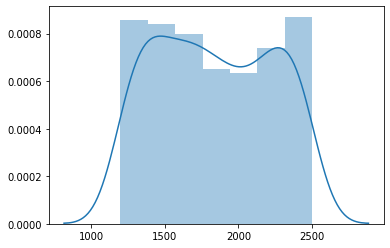

In [49]:
sns.distplot(first)

Again there is an issue as just using a regular normal distribution can return some values that are unrealistically below the minimum threshold of 1200 calories. Setting the mean to 1500 and 

In [55]:
second = np.random.normal(1500, 200, 365)
second

array([1498.08816016, 1490.29703659, 1418.03459004, 1555.97227665,
       1511.94189584, 1468.26420264, 1895.88744764, 1575.48937598,
       1530.22610756, 1339.10401833, 1621.51853343, 1516.67760633,
       1699.97097828, 1274.55516417, 1801.24623843, 1308.58115888,
       1685.46446384, 1518.28985833, 1460.01117033, 1412.44128822,
       1399.0127053 , 1392.81479012, 1558.45672273, 1484.99673511,
       1853.75338789, 1694.22171103, 1270.35640289, 1441.83830097,
       1711.03088039, 1528.81473268, 1225.64607051, 1527.61013286,
       1573.3217146 , 1153.50837096, 1898.44536814, 1157.98185776,
       1636.69805898, 1440.35010903, 1729.27548196, 1363.6978203 ,
       1662.07888168, 1215.20331558, 1754.13166998, 1466.01003207,
       1477.23006664, 1021.66947582, 1338.26402614, 1484.2084872 ,
       1553.32053499, 1588.96082077, 1459.00860327, 1449.07490584,
       1311.05853291, 1460.86010369, 1522.73748123, 1327.06300005,
       1500.11174447, 1518.4990194 , 1325.50255229, 1537.03803

The solution below used a truncated normal distribution which allows a range to be set and the data is normally distributed. I have also converted the results to integers as Zoe would realistically be tracking decimals of a calorie.

[1379 1393 1680 1212 1357 1777 1698 1317 1316 1571 1739 1207 1760 1678
 1256 1710 1747 1591 1438 1432 1246 1220 1569 1763 1562 1342 1515 1267
 1686 1641 1573 1621 1549 1634 1366 1323 1505 1299 1528 1978 1443 1426
 1572 1686 1599 1548 1522 1290 1618 1360 1642 1692 1614 1487 1447 1310
 1703 1558 1515 1628 1692 1294 1401 1369 1307 1449 1551 1507 1697 1401
 1369 1497 1217 1875 1232 1304 1929 1417 1806 1752 1265 1403 1879 1804
 1569 1440 1293 1562 1310 1556 1484 1531 1345 1397 1525 1672 1248 1781
 1546 1300 1449 1215 1512 1807 1591 1516 1673 1636 1520 1494 1574 1654
 1466 1810 1201 1562 1420 1642 1366 1633 1455 1788 1635 1416 1360 1375
 1626 1252 1530 1662 1834 1572 1516 1364 1631 1446 1902 1735 1538 1844
 1603 1480 1473 1601 1422 1593 1675 1638 1457 1329 1562 1454 1667 1382
 1218 1646 1459 1535 1960 1417 1670 1941 1769 1375 1691 1618 1208 1345
 1335 1456 1299 1471 1521 1509 1200 1532 1590 1401 1365 1500 1538 1481
 1522 1557 1500 1536 1564 1724 1646 1367 1909 1695 1472 1473 1355 1705
 1315 

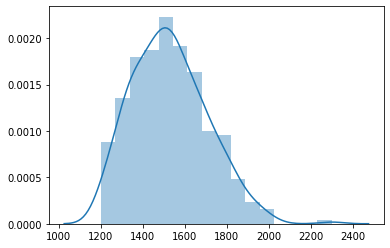

In [51]:
# https://stackoverflow.com/a/18444710 
# https://stackoverflow.com/a/53948014

# The lowest 
low = 1200
high = 2500
mu = 1500
sigma = 200

x = stats.truncnorm((low - mu) / sigma, (high - mu) / sigma, loc=mu, scale=sigma)


# https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.truncnorm.html

calories_in = x.rvs(365)

# https://stackoverflow.com/a/37411711
calories_in = calories_in.astype(int)
calories_in

print(calories_in)
sns.distplot(calories_in)


## Weight Loss

Could I do some kind of probability distribution that makes total weight go up/down?

Or have one column with weight lost daily/weekly and then add/subtrct that to total weight in another column?

Weight lost every week: Say I lose an average of 0.5kg per week with a standard deviation of 0.25 and over a normal distribution.

Or with daily say it's 0.1kg per day average with a sd of 0.05g

No! I should base the weight loss on the other variables - exercise and calories - with a random amount added or subtracted as weight loss is not exact (is this noise?)


To account for daily fluctuations, weight loss or gain will not only depend on calories in/out but will also include a random variant. 


In [3]:
# Weight lost weekly. 104 rows 

np.random.normal(0.5, 0.25, 104)

array([ 0.48055521,  0.44827353,  0.37657714,  0.94817863,  0.67786405,
        0.29871448,  0.52323585,  0.37332125,  0.25653545,  0.14368788,
        0.53767549,  0.40787428,  0.79800474,  0.6540749 ,  0.33416117,
        0.51950201,  0.43169395,  0.66521406,  0.93024271,  0.42838672,
        0.76262367,  0.39973978,  0.22249537,  0.37974175,  0.59489701,
        0.6153225 ,  0.33712963,  0.71622593,  0.42374726,  0.48985766,
        0.57274321,  0.34415664,  0.47620664,  0.15097124,  0.6853785 ,
        0.40059696,  0.61274841,  0.16280864,  0.23143242,  0.63945403,
        0.55142052,  0.29082324,  0.03577611,  0.69649855,  0.80007367,
        0.45230079,  0.35711728, -0.32274194,  0.37568517,  0.71055789,
        0.19939859,  0.47341979,  0.95129441,  0.4372694 ,  0.82877567,
        0.71961439,  0.72867572,  0.55210346,  0.74857188,  0.27919477,
        0.524623  ,  0.95452667,  0.78282383,  0.77630728,  0.13538547,
        0.46504802,  0.6038492 ,  0.24347475,  0.70252888,  0.89

In [4]:
# Weight lost daily. 119 rows
np.random.normal(0.1, 0.05, 119)

array([ 0.06653508,  0.1084823 ,  0.12132907,  0.09214917,  0.14797802,
        0.08233557,  0.11469866,  0.11747359,  0.10815189,  0.07642358,
        0.07418683,  0.07955336, -0.00193811,  0.12179124,  0.19588352,
        0.08096812,  0.12619661,  0.1498013 ,  0.1821961 ,  0.12159502,
        0.05773352,  0.12960094,  0.13035353,  0.02414479,  0.15530385,
        0.15019504,  0.05091494,  0.09532243,  0.15198879,  0.0667313 ,
        0.18772655,  0.06479214,  0.10348458,  0.10380961,  0.1365718 ,
        0.0859475 ,  0.14131143,  0.06762165,  0.12054157,  0.14398147,
        0.08309198,  0.0481723 ,  0.09450384,  0.13714457,  0.03766729,
        0.10631512,  0.12182329,  0.09914321,  0.17543918,  0.19001064,
        0.00127832,  0.09080357,  0.11043911,  0.10318031,  0.10047428,
        0.18674167,  0.1675915 ,  0.07026658,  0.0143609 ,  0.08169121,
        0.02096385,  0.18539152,  0.06575867,  0.07208284,  0.14096826,
        0.12279556,  0.10526863,  0.0739302 ,  0.06581024, -0.02

## Exercise

This makes a case for doing a daily dataset - can't figure out how to do this weekly

Either use randint or random choice

With randint - assign exercises to different integers

None = 1
Walk = 2
Jog = 3
Yoga = 4

With random choice the options are (None, Walk, Jog, Yoga)

Use choice as you can set probability for each option.

Jan-Apr = 119 days = 17 weeks

Say I do some form of exercise about 5 days per week: None = 2 * 17 = 34 days of no exercise = ~28% (make it 29 for 100% probability altogether)

I walk 3 days per week: Walk = 3 * 104 = 51 walks = ~43%

I jog 1 day per week = 17 jogs = ~14%

I have a yoga class about 1 day per week = 17 yoga classes = ~14%


OR!

I could still do the weekly thing if I change the size so it gives an array!


Exercise not the most important thing for weight loss: https://www.vox.com/2016/4/28/11518804/weight-loss-exercise-myth-burn-calories

Exercise and calories burned: https://www.sciencealert.com/how-to-calculate-calories-burned-met-value-exercise?perpetual=yes&limitstart=1

In [5]:
excercises = ["none", "walk", "jog", "yoga"]

np.random.choice(excercises, size = (119, 7), p=[0.29, 0.43, 0.14, 0.14])

array([['none', 'walk', 'none', 'jog', 'walk', 'none', 'walk'],
       ['walk', 'none', 'jog', 'walk', 'walk', 'jog', 'walk'],
       ['jog', 'none', 'walk', 'walk', 'walk', 'walk', 'walk'],
       ['walk', 'walk', 'none', 'walk', 'walk', 'none', 'none'],
       ['none', 'walk', 'walk', 'none', 'walk', 'none', 'jog'],
       ['walk', 'walk', 'none', 'walk', 'walk', 'jog', 'none'],
       ['none', 'none', 'none', 'none', 'walk', 'yoga', 'yoga'],
       ['walk', 'yoga', 'none', 'walk', 'jog', 'walk', 'none'],
       ['walk', 'walk', 'yoga', 'jog', 'none', 'yoga', 'walk'],
       ['jog', 'yoga', 'walk', 'none', 'walk', 'jog', 'none'],
       ['jog', 'none', 'walk', 'yoga', 'walk', 'none', 'none'],
       ['yoga', 'jog', 'none', 'walk', 'yoga', 'walk', 'yoga'],
       ['yoga', 'walk', 'walk', 'walk', 'walk', 'walk', 'yoga'],
       ['walk', 'walk', 'jog', 'none', 'walk', 'jog', 'jog'],
       ['jog', 'none', 'walk', 'walk', 'none', 'none', 'yoga'],
       ['walk', 'yoga', 'none', 'none', '

Since BMR and TDEE are both going to change as weight fluctuates, I have created the function below to recalculate them each day as part of the calories burned. I have used the Mifflin-St Jeor calculation as it is widely used and deemed to be quite accurate

In [9]:
# TDEE function
# only weight will change in this calculation

def tdee(weight):
    bmr = 10 * weight + 6.25 * 175 - 5 * 30 -161
    result = bmr * 1.2
    return result

tdee(80)

1899.3

Below is a function that tracks the estimated calories burned by exercising. Our subject exercises most days per week and averages at about 45 minutes per session, sometimes more, sometimes less. She uses her fitbit to calculate the amount of calories burned for each exercise session and logs that into her spreadsheet. 

In [10]:
# https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o

def exercise(activity):
    if activity == 'yoga':
        return np.random.normal(150, 50)
    elif activity == 'walking':
        return np.random.normal(250, 50)
    elif activity == 'jogging':
        return np.random.normal(300, 50)
    else:
        return 0
    
exercise('jogging')

377.291461115321

Study about outdated 3500cal = 1lb idea: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4035446/

In [11]:
def cal_to_gram(calories):
    gram = calories * 0.128205128
    return gram
cal_to_gram(3500)

448.717948